In [21]:
# tratamiento de datos
import pandas as pd

# visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('../data/raw/cscpopendata.csv')

In [23]:
df.sample(5)

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
39944,14379,NARS Velvet Matte Lip Pencil,48033.0,Spell Bound,352,Nars Cosmetics,NARS,44,Makeup Products (non-permanent),53,...,13463-67-7,22029,Titanium dioxide,06/30/2010,11/29/2018,NaN,06/30/2010,08/03/2015,NaN,1
32730,10679,Natural Radiance Mineral Powder Foundation Bro...,NaN,NaN,290,Arbonne International LLC,Arbonne Cosmetics,44,Makeup Products (non-permanent),50,...,NaN,34642,Retinyl palmitate,04/20/2010,06/30/2017,NaN,04/17/2014,04/17/2014,NaN,2
96831,35540,Sweet Escape Eye & Cheek Palette,54638.0,rum runner,224,Tarte Cosmetics,"tarte, inc.",44,Makeup Products (non-permanent),48,...,13463-67-7,57172,Titanium dioxide,11/15/2018,11/15/2018,NaN,11/15/2018,11/15/2018,NaN,1
63897,22921,KISSKISS STRASS CRYSTAL SHINE SHIMMERING COLOURS,35093.0,340 BEIGE MOUSSELINE,298,GUERLAIN,GUERLAIN,44,Makeup Products (non-permanent),53,...,13463-67-7,34861,Titanium dioxide,05/23/2014,05/24/2018,07/31/2014,05/23/2014,02/12/2015,NaN,1
91209,33399,"Precisely, My Brow Pencil",52936.0,Shade 2,191,Benefit Cosmetics,Benefit Cosmetics,44,Makeup Products (non-permanent),46,...,13463-67-7,53972,Titanium dioxide,06/26/2018,10/18/2019,NaN,06/26/2018,10/18/2019,NaN,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CDPHId                  114635 non-null  int64  
 1   ProductName             114635 non-null  object 
 2   CSFId                   80662 non-null   float64
 3   CSF                     80237 non-null   object 
 4   CompanyId               114635 non-null  int64  
 5   CompanyName             114635 non-null  object 
 6   BrandName               114408 non-null  object 
 7   PrimaryCategoryId       114635 non-null  int64  
 8   PrimaryCategory         114635 non-null  object 
 9   SubCategoryId           114635 non-null  int64  
 10  SubCategory             114635 non-null  object 
 11  CasId                   114635 non-null  int64  
 12  CasNumber               108159 non-null  object 
 13  ChemicalId              114635 non-null  int64  
 14  ChemicalName        

1. CDPHId: identificador interno del producto
2. ProductName: nombre del producto           
3. CSFId:  número de identificación del color, aroma o sabor asignado por CDPH, tenemos 33.973 nulos               
4. CSF: nombre textual de ese color, aroma o sabor. tenemos 34.398 nulos 
5. CompanyId: ID de la compañia
6. CompanyName: nombre de la compañia
7. BrandName: nombre de la marca
8. PrimaryCategoryId: identificador de la categoria primaria
9. PrimaryCategory: nombre de la categoria primaria
10. SubCategoryId: identificador de la subcategoria
11. SubCategory: nombre de la subcategoria
12. CasId: Ingrediente químico (interno del producto)         
13. CasNumber: Número CAS global de la sustancia, tenemos 6.476 nulos     
14. ChemicalId: ID del nombre quimico
15. ChemicalName: Instancia química específica del producto
16. InitialDateReported: fecha en que el perfil del producto (no del ingrediente) fue creado por primera vez y enviado por el fabricante
17. MostRecentDateReported: fecha en que el perfil del producto fue modificado por última vez antes de su presentación al CDPH
18. DiscontinuedDate: Fecha en que CDPH marcó el producto como ya no disponible en el mercado. Si está vacía (NaN), el producto aún se considera activo, tenemos 101.715 nulos
19. ChemicalCreatedAt: Fecha en que se reportó por primera vez ese ingrediente químico en el producto específico     
20. ChemicalUpdatedAt: Última fecha en que se modificó el registro del ingrediente químico para ese producto  
21. ChemicalDateRemoved: Fecha en que este ingrediente fue eliminado del producto (reformulación), tenemos 111.650 nulos
22. ChemicalCount: Número de químicos actualmente REPORTADOS en el producto, excluyendo aquellos que fueron eliminados    

## DUPLICADOS
verificamos si hay duplicados en nuestro DF y los eliminamos para limpiar la base

In [25]:
df.duplicated().sum()

np.int64(254)

In [26]:
df = df.drop_duplicates()

## NULOS
comprobamos los valores nulos que tenemos en el DF para gestionarlos

vemos que tenemos pocas columnas con valores nulos, de los cuales:
- ChemicalDateRemoved: alta cantidad 97.39% nulos, significa que para la gran mayoría de los registros, el ingrediente no ha sido eliminado
- DiscontinuedDate: alta cantidad 88.75% nulos, pero nos indica que son productos activos en el mercado.
- CSF: cantidad moderada 29.86% de nulos, significa que no tienen colorantes, aromas o sabores aplicados
- CSFId: cantidad moderada 29.49% de nulos, significa que no tienen colorantes, aromas o sabores aplicados
- CasNumber: 5.66%, cantidad muy baja de nulos podemos eliminarlos
- BrandName: 0.20%, cantidad muy baja de nulos podemos eliminarlos

In [27]:
df.isna().sum().sort_values(ascending=False)

ChemicalDateRemoved       111396
DiscontinuedDate          101508
CSF                        34156
CSFId                      33731
CasNumber                   6475
BrandName                    227
CDPHId                         0
ChemicalId                     0
ChemicalUpdatedAt              0
ChemicalCreatedAt              0
MostRecentDateReported         0
InitialDateReported            0
ChemicalName                   0
CasId                          0
ProductName                    0
SubCategory                    0
SubCategoryId                  0
PrimaryCategory                0
PrimaryCategoryId              0
CompanyName                    0
CompanyId                      0
ChemicalCount                  0
dtype: int64

In [28]:
round(df.isna().mean()*100,2).sort_values(ascending=False)

ChemicalDateRemoved       97.39
DiscontinuedDate          88.75
CSF                       29.86
CSFId                     29.49
CasNumber                  5.66
BrandName                  0.20
CDPHId                     0.00
ChemicalId                 0.00
ChemicalUpdatedAt          0.00
ChemicalCreatedAt          0.00
MostRecentDateReported     0.00
InitialDateReported        0.00
ChemicalName               0.00
CasId                      0.00
ProductName                0.00
SubCategory                0.00
SubCategoryId              0.00
PrimaryCategory            0.00
PrimaryCategoryId          0.00
CompanyName                0.00
CompanyId                  0.00
ChemicalCount              0.00
dtype: float64

## COLUMNAS NUMERICAS

In [29]:
df.describe(include='number').T.round(2)

,count,mean,std,min,25%,50%,75%,max
CDPHId,114381.0,20338.03,12481.33,2.0,8791.0,20910.0,31380.00,41524.0
CSFId,80650.0,32608.71,19090.71,1.0,15788.0,32542.0,48720.75,65009.0
CompanyId,114381.0,451.19,409.71,4.0,86.0,298.0,798.00,1391.0
PrimaryCategoryId,114381.0,51.13,20.46,1.0,44.0,44.0,59.00,111.0
SubCategoryId,114381.0,66.89,35.82,3.0,48.0,52.0,65.00,172.0
CasId,114381.0,673.15,148.02,2.0,656.0,656.0,656.00,1242.0
ChemicalId,114381.0,32909.64,20403.73,0.0,14092.0,32114.0,51641.00,68074.0
ChemicalCount,114381.0,1.29,0.64,0.0,1.0,1.0,1.00,9.0


## HISTOGRAMAS

In [30]:
col_numericas = ['ChemicalCount','CDPHId','ChemicalId']

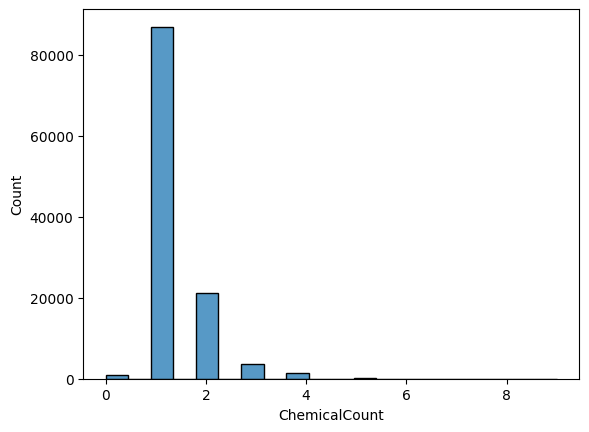

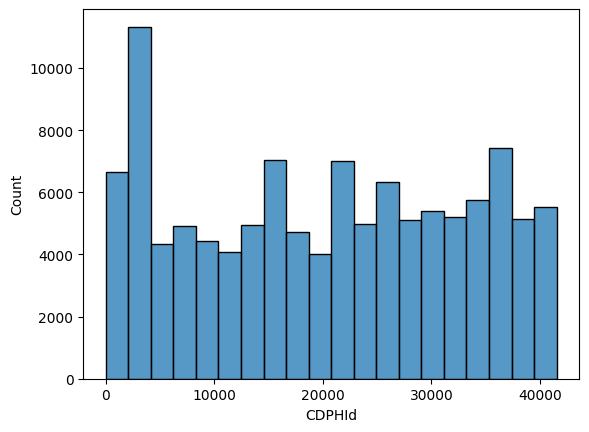

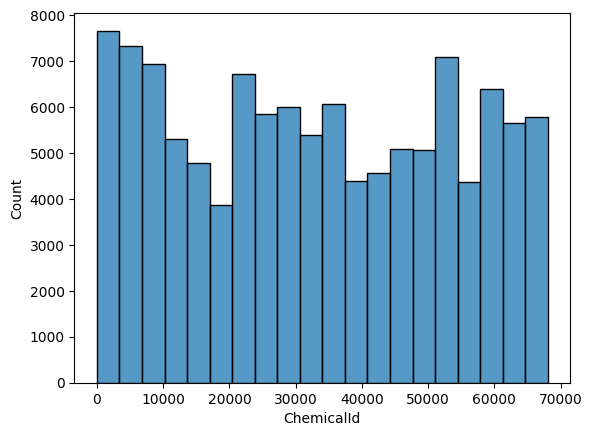

In [31]:
for col in col_numericas:

    plt.figure()
    sns.histplot(df[col], bins=20)
    plt.show()

## HEATMAP

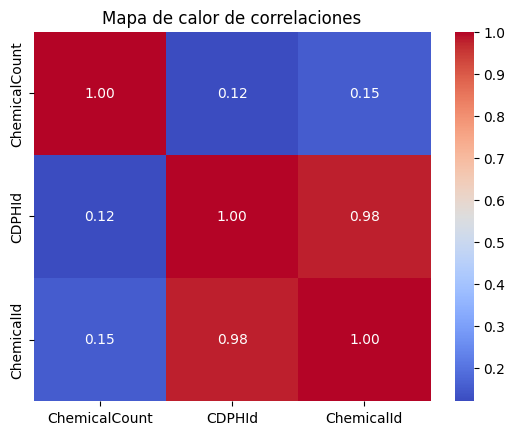

In [32]:
corr = df[col_numericas].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlaciones')
plt.show()

## COLUMNAS FECHAS

In [33]:
df['InitialDateReported'] = pd.to_datetime(df['InitialDateReported'])
df['MostRecentDateReported'] = pd.to_datetime(df['MostRecentDateReported'])
df['DiscontinuedDate'] = pd.to_datetime(df['DiscontinuedDate'])
df['ChemicalCreatedAt'] = pd.to_datetime(df['ChemicalCreatedAt'])
df['ChemicalUpdatedAt'] = pd.to_datetime(df['ChemicalUpdatedAt'])
df['ChemicalDateRemoved'] = pd.to_datetime(df['ChemicalDateRemoved'])

## COLUMNAS CATEGORICAS

In [34]:
df.describe(include=['category','object']).T

,count,unique,top,freq
ProductName,114381,33716,Eyecolor,766
CSF,80225,34326,Black,247
CompanyName,114381,606,L'Oreal USA,5747
BrandName,114154,2713,SEPHORA,3394
PrimaryCategory,114381,13,Makeup Products (non-permanent),75822
SubCategory,114381,89,"Lip Color - Lipsticks, Liners, and Pencils",16553
CasNumber,107906,125,13463-67-7,93048
ChemicalName,114381,123,Titanium dioxide,93479


In [35]:
col_categoricas = df.select_dtypes(['object','category']).columns

for col in col_categoricas:
    print(f'la columna {col} tiene un total de {df[col].nunique()} valores distintos')

    print('los 10 valores mas repetidos son:')
    display(df[col].value_counts(dropna=False).head(10))

la columna ProductName tiene un total de 33716 valores distintos
los 10 valores mas repetidos son:


ProductName
Eyecolor                                                                               766
Nail Lacquer                                                                           667
BLACK LABEL LIPSTICK                                                                   487
NYX GIRLS NAIL POLISH                                                                  462
ROUND LIPSTICK                                                                         427
Eye Shadow                                                                             394
Permanent Cosmetics Color                                                              393
SEPHORA - COLORFUL OMBRE A PAUPIERES DECLIPSABLE / COLORFUL REMOVABLE EYESHADOW PAN    315
Lipstick                                                                               314
NARS Single Eyeshadow                                                                  306
Name: count, dtype: int64

la columna CSF tiene un total de 34326 valores distintos
los 10 valores mas repetidos son:


CSF
NaN                 34156
Black                 247
Light                 245
Titanium Dioxide      237
Medium                234
Nude                  155
Ivory                 138
titanium dioxide      132
Natural Beige         129
02                    126
Name: count, dtype: int64

la columna CompanyName tiene un total de 606 valores distintos
los 10 valores mas repetidos son:


CompanyName
L'Oreal USA                            5747
S+                                     5165
Coty                                   5162
Revlon Consumer Product Corporation    4341
Bare Escentuals Beauty, Inc.           3828
The Procter & Gamble Company           3535
NYX Los Angeles, Inc.                  3227
Charlotte Tilbury Beauty Ltd           2768
Tarte Cosmetics                        2497
Victoria's Secret Beauty               2219
Name: count, dtype: int64

la columna BrandName tiene un total de 2713 valores distintos
los 10 valores mas repetidos son:


BrandName
SEPHORA                     3394
NYX                         3227
bareMinerals                3158
Charlotte Tilbury           2451
Revlon                      2335
NARS                        2185
Victoria's Secret Beauty    2106
tarte                       2101
Sally Hansen                1834
Sephora                     1767
Name: count, dtype: int64

la columna PrimaryCategory tiene un total de 13 valores distintos
los 10 valores mas repetidos son:


PrimaryCategory
Makeup Products (non-permanent)      75822
Nail Products                        15347
Skin Care Products                    7680
Sun-Related Products                  4939
Bath Products                         3463
Hair Coloring Products                1882
Hair Care Products (non-coloring)     1566
Tattoos and Permanent Makeup          1477
Personal Care Products                 765
Fragrances                             644
Name: count, dtype: int64

la columna SubCategory tiene un total de 89 valores distintos
los 10 valores mas repetidos son:


SubCategory
Lip Color - Lipsticks, Liners, and Pencils     16553
Eye Shadow                                     15744
Foundations and Bases                          14095
Nail Polish and Enamel                          9945
Lip Gloss/Shine                                 8972
Eyeliner/Eyebrow Pencils                        5948
Face Powders                                    4927
Sunscreen (making a cosmetic claim)             4557
Blushes                                         4082
Skin Moisturizers (making a cosmetic claim)     3364
Name: count, dtype: int64

la columna CasNumber tiene un total de 125 valores distintos
los 10 valores mas repetidos son:


CasNumber
13463-67-7    93048
NaN            6475
79-81-2        2288
1333-86-4      2191
12001-26-2     1919
25013-16-5     1888
14807-96-6     1499
68603-42-9     1343
102-71-6        455
0               416
Name: count, dtype: int64

la columna ChemicalName tiene un total de 123 valores distintos
los 10 valores mas repetidos son:


ChemicalName
Titanium dioxide                                                                                       93479
Silica, crystalline (airborne particles of respirable size)                                             2816
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.     2154
Mica                                                                                                    1919
Butylated hydroxyanisole                                                                                1888
Carbon black                                                                                            1758
Talc                                                                                                    1549
Cocamide diethanolamine                                                                                 1397
Retinyl palmitate                                                                                       1181
Vitami